<a href="https://colab.research.google.com/github/lucygranger/COGS108_Repo/blob/main/EDACheckpoint_Group101_FA23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - Data Checkpoint

## Names

- Jenny Quach
- Lucy Granger
- Anvita Suresh
- Boston Thome
- Angela (Anqi) Wu

# Research Question

Which variable(s) out of the following - audience rating, genre, release date, studio, and number of nominations in other categories - can be best used to predict whether a movie will win the Best Picture Award at the Oscars out of the nominees?



## Background and Prior Work


The Oscars are annual awards that are meant to recognize movies in various categories for excellence in cinematic achievements and film work. These awards deliver great amounts of recognition and prestige to those who win and are determined by the Academy of Motion Picture Arts and Sciences (AMPAS). The award of Best Picture is the most prestigious and sought out award at this event.

However, the winning movie might not necessarily be the one that we expect. Oftentimes, the movie that has the highest audience rating does not end up being the movie that wins. There have been many cases where a film is critically acclaimed but still bombed at the box office. Therefore, we wanted to see if there was indeed a relationship between certain movie attributes and its likelihood of winning at the Oscars.

This topic has definitely been explored on the internet before. One analysis done by DataRes at UCLA looked at relationships between factors such as the influence of the director, production house, film budget, box office revenue and genre. This article would be very helpful because it does not answer the question we are trying to answer but gives us some insight on what causes certain movies to have better box office revenue than others. Through our exploration and research, we may find a correlation between revenue and Oscar winners with the help of this article.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1)

Another analysis conducted by the Bloomberg company shows what it would look like if Hollywood were to engineer a best actor, best actress, and best picture with the picture being a drama, between 121 and 160 minutes long, released in the final months of the year by Columbia Pictures, that had an average budget of 290 million at the box office. This article relates to our question because it can give us insight into what the authors of the article believe to be important attributes of the best picture awards. We can compare our findings with this article and see if there is a correlation between what they have deemed significant to ‘build an Oscar winner’ and the data we have collected.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)


1. <a name="cite_note-1"></a> [^](#cite_ref-1) DataRes at UCLA. (28 Mar 2022) The Success of Movies at the Oscars, Box Office, and Reviews. Medium. https://ucladatares.medium.com/the-success-of-movies-at-the-oscars-box-office-and-reviews-e33e5059ea40
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Keith Collins and Adam Pearce. (18 Feb 2015) How to Build an Oscar Winner. https://www.bloomberg.com/graphics/2015-oscar-winners/


# Hypothesis


We believe that yes, there are attributes that can be used to predict the Oscar Best Picture Award winner from the nominees: specifically the audience rating, genre, movie studio, time of release, and number of categories nominated for. We believe that the number of categories nominated for will be the most influential attribute to predicting the Oscar Best Picture award winner because if the Academy Award board deems the movie good enough to nominate for other categories, the board probably also favors that movie for the Best Picture award.

# Data

## Data overview

Dataset #1:

- Name: Academy Awards Oscars: Nominees and Winners 1927 to Present
- Link: https://datahub.io/rufuspollock/oscars-nominees-and-winners#resource-oscars-nominees-and-winners_zip
- Number of Observations: 11,058
- Number of Variables: 4

Dataset #2:
- Name: Oscar Best Picture Movies
- Link: https://www.kaggle.com/datasets/martinmraz07/oscar-movies
- Number of Observations: 571
- Number of Variables: 30

Dataset #1 contains a list of all nominees and winners in every single Oscar category since 1927. The important variables here would be the winner/nominee distinction and  the title of the movie. One of the attributes we are interested in looking at are how many nominations each movie has, and because this dataset contains all the nominees for every Oscar category, we could check to see how many nominations each movie has and create another variable for that. After we did that, we could just drop all of the nominations that are not for Best Picture.

Dataset #2 is a list of all the Best Picture winners and nominees. The variables we are interested in here are the movie genres, studio, date of release, and IMDB and Rotten Tomatoes audience ratings. There are a lot of unnecessary variables such as movie length and cast, so we would drop all of those columns.

We would merge the two datasets together by matching the movie titles to get a dataset with all five of the attributes we are interested in.


In [ ]:
%pip install missingno

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

## Dataset #1 (use name instead of number here)

In [ ]:
oscar_winner = pd.read_csv('https://datahub.io/rufuspollock/oscars-nominees-and-winners/r/0.csv')
oscar_winner

,year,category,winner,entity
0,1927,ACTOR,False,Richard Barthelmess
1,1927,ACTOR,True,Emil Jannings
2,1927,ACTRESS,False,Louise Dresser
3,1927,ACTRESS,True,Janet Gaynor
4,1927,ACTRESS,False,Gloria Swanson
...,...,...,...,...
11053,2017,SCIENTIFIC AND TECHNICAL AWARD (Scientific and...,True,"To LEONARD CHAPMAN for the overall concept, de..."
11054,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To JASON SMITH and JEFF WHITE for the original...
11055,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,"To JOE MANCEWICZ, MATT DERKSEN and HANS RIJPKE..."
11056,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To ALEX POWELL for his contribution to the des...


In [ ]:
oscar_greater_1962 = oscar_winner[oscar_winner['year'] >= 1962]

In [ ]:
num_of_noms = []
oscar_greater_1962 = oscar_greater_1962.reset_index(drop=True)
for i in range(len(oscar_greater_1962)):
    row = oscar_greater_1962.iloc[i]
    year = row["year"]
    entity = row["entity"]
    num = len(oscar_greater_1962[(oscar_greater_1962["year"] == year) & (oscar_greater_1962["entity"] == entity)])
    num_of_noms.append(num)
oscar_greater_1962["number_of_nominations"] = num_of_noms
oscar_greater_1962

,year,category,winner,entity,number_of_nominations
0,1962,ACTOR,False,Burt Lancaster,1
1,1962,ACTOR,False,Jack Lemmon,1
2,1962,ACTOR,False,Marcello Mastroianni,1
3,1962,ACTOR,False,Peter O'Toole,1
4,1962,ACTOR,True,Gregory Peck,1
...,...,...,...,...,...
7031,2017,SCIENTIFIC AND TECHNICAL AWARD (Scientific and...,True,"To LEONARD CHAPMAN for the overall concept, de...",1
7032,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To JASON SMITH and JEFF WHITE for the original...,1
7033,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,"To JOE MANCEWICZ, MATT DERKSEN and HANS RIJPKE...",1
7034,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To ALEX POWELL for his contribution to the des...,1


In [ ]:
oscar_greater_1962[oscar_greater_1962["number_of_nominations"] > 1]

,year,category,winner,entity,number_of_nominations
20,1962,ART DIRECTION (Black-and-White),False,Days of Wine and Roses,3
21,1962,ART DIRECTION (Black-and-White),False,The Longest Day,5
24,1962,ART DIRECTION (Black-and-White),True,To Kill a Mockingbird,6
25,1962,ART DIRECTION (Color),True,Lawrence of Arabia,8
26,1962,ART DIRECTION (Color),False,Meredith Willson's The Music Man,6
...,...,...,...,...,...
7014,2017,WRITING (Adapted Screenplay),False,Mudbound,3
7016,2017,WRITING (Original Screenplay),True,Get Out,3
7017,2017,WRITING (Original Screenplay),False,Lady Bird,3
7018,2017,WRITING (Original Screenplay),False,The Shape of Water,10


In [ ]:
best_picture = oscar_greater_1962[oscar_greater_1962['category'] == 'BEST PICTURE']
best_picture

,year,category,winner,entity,number_of_nominations
85,1962,BEST PICTURE,True,Lawrence of Arabia,8
86,1962,BEST PICTURE,False,The Longest Day,5
87,1962,BEST PICTURE,False,Meredith Willson's The Music Man,6
88,1962,BEST PICTURE,False,Mutiny on the Bounty,7
89,1962,BEST PICTURE,False,To Kill a Mockingbird,6
...,...,...,...,...,...
6975,2017,BEST PICTURE,False,Lady Bird,3
6976,2017,BEST PICTURE,False,Phantom Thread,4
6977,2017,BEST PICTURE,False,The Post,1
6978,2017,BEST PICTURE,True,The Shape of Water,10


## Dataset #2 (if you have more than one, use name instead of number here)

In [ ]:
url='https://drive.google.com/file/d/10jk1O4OE44nqZ8iDIt6hf3EKWV7Gr75V/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Streaming Release Date', 'Film ID', 'Year of Release', 'Movie Genre',
        'Production Company', 'Movie Info', 'Audience Status', 'Audience Rating', 'Audience Count', 'Directors',
        'Authors', 'Actors', 'Content Rating', 'Movie Time', 'Tomatometer Status', 'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count',
        'Tomatometer Rotten Critics Count', 'Film ID', 'Critic Consensus'])
df = df.dropna()

In [ ]:
df.head()

,Film,Oscar Year,Film Studio/Producer(s),Award,IMDB Rating,IMDB Votes,Genres,Original Release Date,Tomatometer Rating,Tomatometer Count
0,Wings,1927/28,Famous Players-Lasky,Winner,7.5,"12,221","Action & Adventure, Classics",1927-08-12,93.0,46.0
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,5.7,"6,890","Musical & Performing Arts, Romance",1929-02-01,33.0,24.0
6,In Old Arizona,1928/29,Fox,Nominee,5.6,"1,019","Action & Adventure, Classics, Western, Romance",1928-12-25,56.0,9.0
9,The Big House,1929/30,Cosmopolitan,Nominee,7.1,"2,079","Classics, Drama",1930-05-14,75.0,8.0
13,Cimarron,1930/31,RKO Radio,Winner,5.9,"5,851","Classics, Drama, Western",1931-01-26,50.0,24.0


# Combining Datasets


Let's merge the two datasets based on the Film Title

In [ ]:
bestpicture = oscar_greater_1962[oscar_greater_1962['category'] == 'BEST PICTURE']
bestpicture = bestpicture.rename(columns = {'entity':'Film', 'number_of_nominations':'Nominations'})
bestpicture = bestpicture.drop(columns =['category', 'year', 'winner'])
oscardata = pd.merge(bestpicture, df, on="Film")
oscardata

,Film,Nominations,Oscar Year,Film Studio/Producer(s),Award,IMDB Rating,IMDB Votes,Genres,Original Release Date,Tomatometer Rating,Tomatometer Count
0,Lawrence of Arabia,8,1962,Sam Spiegel,Winner,8.3,"278,596","Action & Adventure, Classics, Drama",1962-12-16,98.0,88.0
1,The Longest Day,5,1962,Darryl F. Zanuck,Nominee,7.8,"53,759","Action & Adventure, Classics, Drama",1962-06-01,87.0,23.0
2,Mutiny on the Bounty,7,1935,Metro-Goldwyn-Mayer,Winner,7.7,"21,805","Action & Adventure, Classics, Drama",1935-11-08,93.0,41.0
3,Mutiny on the Bounty,7,1962,Aaron Rosenberg,Winner,7.2,"15,634","Action & Adventure, Classics, Drama",1962-11-08,68.0,19.0
4,America America,4,1963,Elia Kazan,Nominee,7.8,"5,215",Drama,1963-12-15,67.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
265,Dunkirk,8,2017,Emma Thomas and Christopher Nolan,Nominee,7.8,"591,901","Action & Adventure, Drama",2017-07-21,92.0,453.0
266,Get Out,3,2017,"Sean McKittrick, Jason Blum, Edward H. Hamm Jr...",Nominee,7.7,"526,587","Horror, Mystery & Suspense",2017-02-24,98.0,386.0
267,Lady Bird,3,2017,"Scott Rudin, Eli Bush, and Evelyn O'Neill",Nominee,7.4,"258,867","Comedy, Drama",2017-11-03,99.0,391.0
268,The Shape of Water,10,2017,Guillermo del Toro and J. Miles Dale,Winner,7.3,"391,523","Drama, Science Fiction & Fantasy, Romance",2017-12-22,92.0,448.0


In [ ]:
oscardata = oscardata.drop(columns=['Oscar Year', 'IMDB Votes', 'Tomatometer Rating', 'Tomatometer Count'])

Now that we have a merged dataset, we want to cleanup a couple of our columns still.

We want to look at the specific month a movie was released in, therefore let's write a function that will turn the Original Release Date into a month.

In [ ]:
def object_to_month(string):
    num = string[5] + string[6]
    if num == '01':
        month = 'January'
    elif num == '02':
        month = 'February'
    elif num == '03':
        month = 'March'
    elif num == '04':
        month = 'April'
    elif num == '05':
        month = 'May'
    elif num == '06':
        month = 'June'
    elif num == '07':
        month = 'July'
    elif num == '08':
        month = 'August'
    elif num == '09':
        month = 'September'
    elif num == '10':
        month = 'October'
    elif num == '11':
        month = 'November'
    elif num == '12':
        month = 'December'
    else:
        month = np.nan
    return month

In [ ]:
oscardata['Month of Release'] = oscardata['Original Release Date'].apply(object_to_month)

Let's clean up the genres as well to make for easier analysis later. Here we write a function that makes it so that every movie is categorized as the genre that is most specific to it.

In [ ]:
def cleanup_genres(string):
    output = []
    if "Classics" in string:
        output.append("Classics")
    if "Science Fiction & Fantasy" in string:
        output.append("SciFi & Fantasy")
    if "Kids & Family" in string:
        output.append("Kids & Family")
    if "Horror" in string:
        output.append("Horror")
    if "Sports & Fitness" in string:
        output.append("Sports")
    if "Musical & Performing Arts" in string:
        output.append("Musical & Arts")
    if "Western" in string:
        output.append("Western")
    if "Action & Adventure" in string:
        output.append("Action")
    if "Comedy" in string and "Romance" in string:
        output.append("RomCom")
    if "Comedy" in string:
        output.append("Comedy")
    if "Romance" in string:
        output.append("Romance")
    if "Mystery & Suspense" in string:
        output.append("Mystery & Suspense")
    if "Drama" in string:
        output.append("Drama")
    return ", ".join(output) if output else np.nan

In [ ]:
oscardata['Genres'] = oscardata['Genres'].apply(cleanup_genres)
oscardata

,Film,Nominations,Film Studio/Producer(s),Award,IMDB Rating,Genres,Original Release Date,Month of Release
0,Lawrence of Arabia,8,Sam Spiegel,Winner,8.3,"Classics,Action,Drama",1962-12-16,December
1,The Longest Day,5,Darryl F. Zanuck,Nominee,7.8,"Classics,Action,Drama",1962-06-01,June
2,Mutiny on the Bounty,7,Metro-Goldwyn-Mayer,Winner,7.7,"Classics,Action,Drama",1935-11-08,November
3,Mutiny on the Bounty,7,Aaron Rosenberg,Winner,7.2,"Classics,Action,Drama",1962-11-08,November
4,America America,4,Elia Kazan,Nominee,7.8,Drama,1963-12-15,December
...,...,...,...,...,...,...,...,...
265,Dunkirk,8,Emma Thomas and Christopher Nolan,Nominee,7.8,"Action,Drama",2017-07-21,July
266,Get Out,3,"Sean McKittrick, Jason Blum, Edward H. Hamm Jr...",Nominee,7.7,"Horror,Mystery & Suspense",2017-02-24,February
267,Lady Bird,3,"Scott Rudin, Eli Bush, and Evelyn O'Neill",Nominee,7.4,"Comedy,Drama",2017-11-03,November
268,The Shape of Water,10,Guillermo del Toro and J. Miles Dale,Winner,7.3,"SciFi & Fantasy,Romance,Drama",2017-12-22,December


We want to check if there is any duplicates after we merge

In [ ]:
oscardata['Film'].value_counts().sort_values(ascending=False)

Romeo and Juliet                             2
Heaven Can Wait                              2
Mutiny on the Bounty                         2
Platoon                                      1
M*A*S*H                                      1
                                            ..
Moonlight                                    1
Darkest Hour                                 1
Dunkirk                                      1
Get Out                                      1
Three Billboards Outside Ebbing, Missouri    1
Name: Film, Length: 267, dtype: int64

In [ ]:
duplicates = ['Romeo and Juliet', 'Heaven Can Wait', 'Mutiny on the Bounty']
for d in duplicates:
  print(oscardata[oscardata['Film'] == d])

                Film  Nominations                    Film Studio/Producer(s)  \
28  Romeo and Juliet            4                        Metro-Goldwyn-Mayer   
29  Romeo and Juliet            4  Anthony Havelock-Allan and John Brabourne   

      Award  IMDB Rating                  Genres Original Release Date  \
28  Nominee          6.5  Classics,Romance,Drama            1936-09-03   
29  Nominee          7.6           Romance,Drama            1968-10-08   

   Month of Release  
28        September  
29          October  
               Film  Nominations Film Studio/Producer(s)    Award  \
68  Heaven Can Wait            6        20th Century-Fox  Nominee   
69  Heaven Can Wait            6           Warren Beatty  Nominee   

    IMDB Rating                                             Genres  \
68          7.4  Classics,SciFi & Fantasy,RomCom,Comedy,Romance...   
69          6.9       SciFi & Fantasy,Sports,RomCom,Comedy,Romance   

   Original Release Date Month of Release  
68     

We observe that the duplicate is actually the same movies name in different year with different studio and producer, not due to our merge. Hence, we will keep the data as it as and will not drop anything

Now, we will be checking for null values data

In [ ]:
oscardata.isna().any(axis=1).value_counts()

False    270
dtype: int64

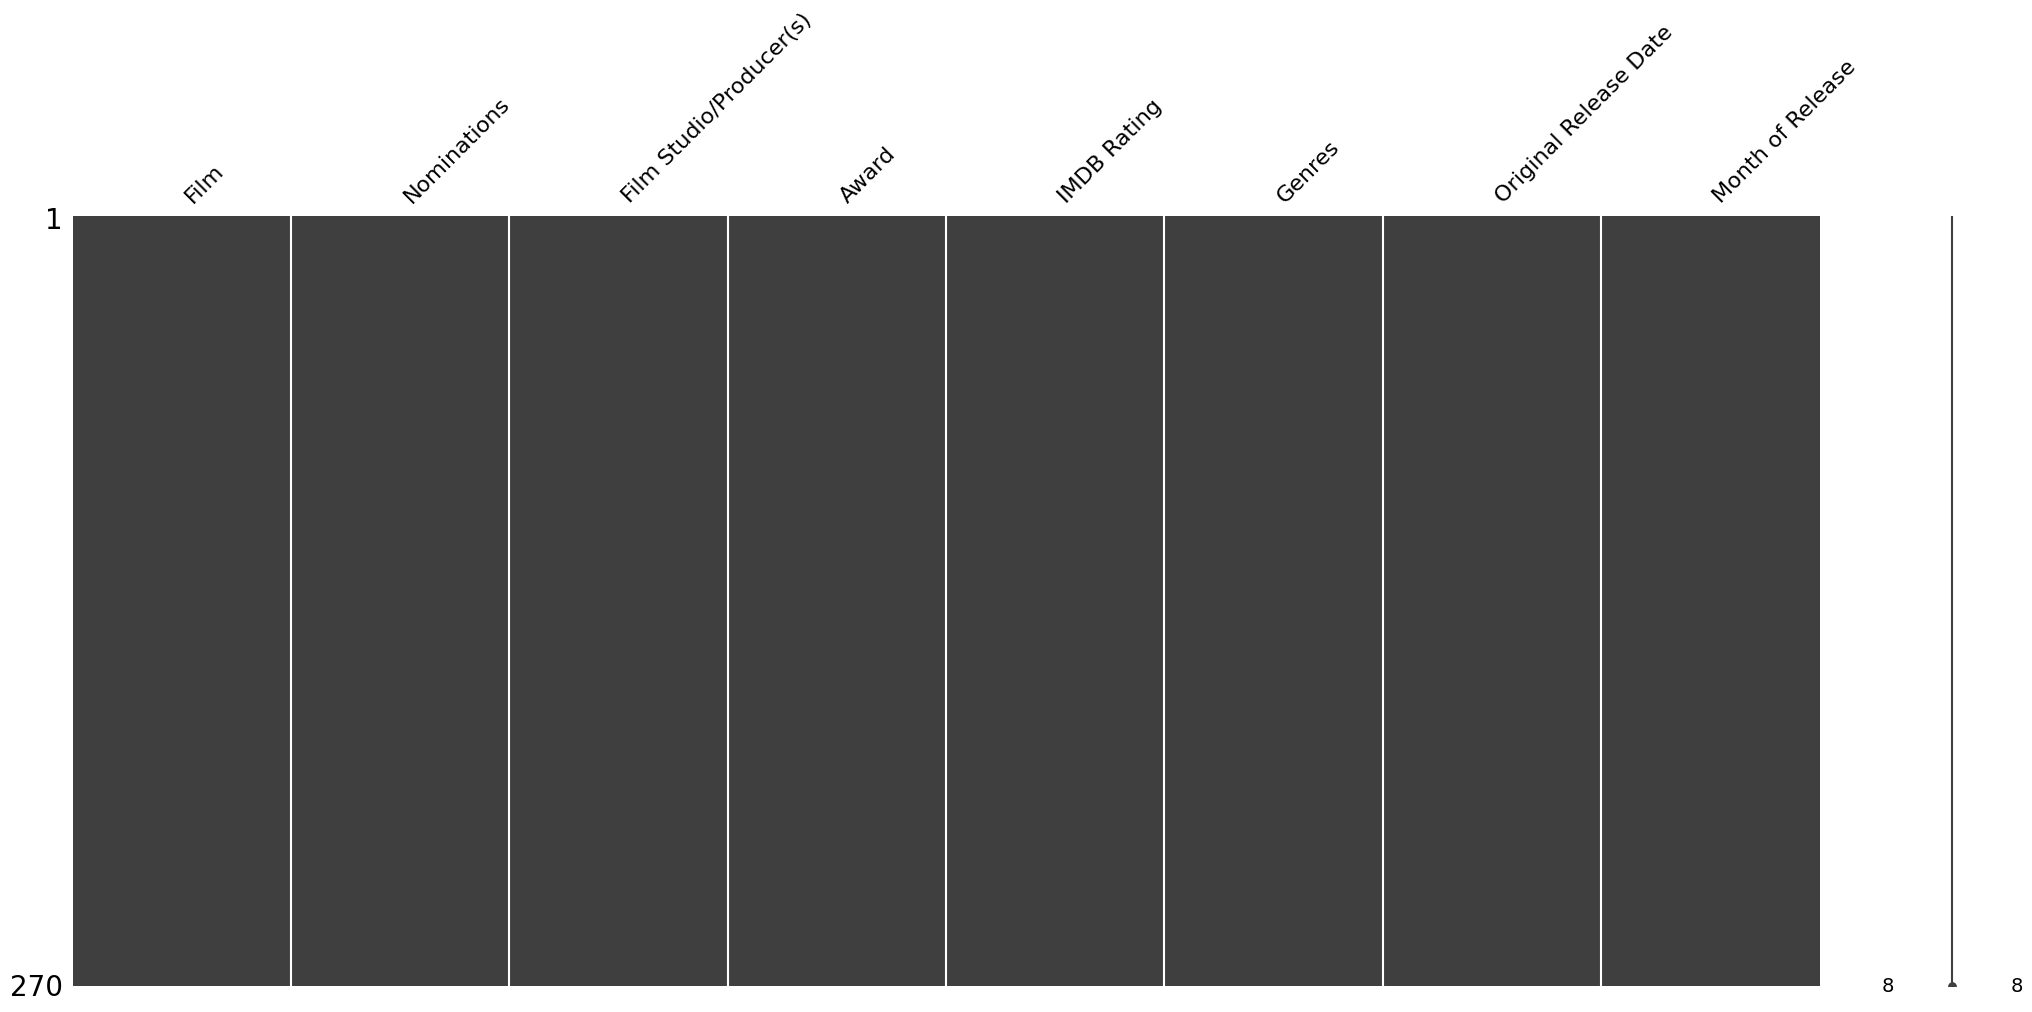

In [ ]:
msno.matrix(oscardata);

As observed, look like all data is good. After all the cleaning, there seem to be no missing values in our dataset at all.

## Exploratory Data Analysis


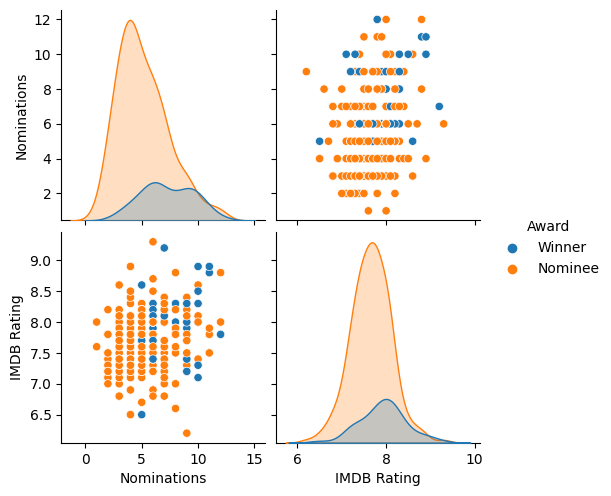

In [ ]:
sns.pairplot(oscardata, hue='Award')

Let's look at the basic statistics in nominations and IMDB rating for both the winner and nominee datasets.

In [ ]:
oscardata.groupby(['Award']).describe()

Nominations                                               IMDB Rating  \
              count      mean       std  min  25%  50%  75%   max       count   
Award                                                                           
Nominee       219.0  5.127854  2.271099  1.0  3.0  5.0  6.0  12.0       219.0   
Winner         51.0  7.274510  2.254581  3.0  6.0  7.0  9.0  12.0        51.0   

                                                      
             mean       std  min  25%  50%  75%  max  
Award                                                 
Nominee  7.657534  0.457732  6.2  7.4  7.7  8.0  9.3  
Winner   7.927451  0.514229  6.5  7.7  8.0  8.2  9.2

Interestingly enough there looks like there might be a difference in nominations but not so much in IMDB rating.

<Axes: xlabel='Award', ylabel='Nominations'>

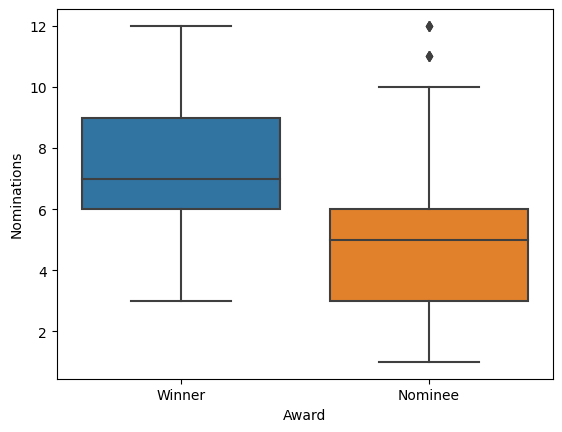

In [ ]:
sns.boxplot(data=oscardata,x='Award',y='Nominations')

<Axes: xlabel='Award', ylabel='IMDB Rating'>

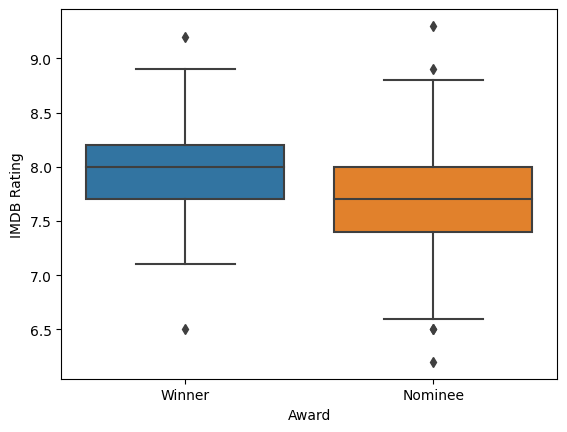

In [ ]:
sns.boxplot(data=oscardata,x='Award',y='IMDB Rating')

Let's split up our data into two datasets: winners and nominees so we can compare the differences between both.

## Section 1 of EDA - please give it a better title than this

In [ ]:
winners = oscardata[oscardata['Award'] == 'Winner']
nominees = oscardata[oscardata['Award'] == 'Nominee']

Now let's take a look at the differences in the month of release between the winners and nominees.

<Axes: xlabel='Month of Release', ylabel='count'>

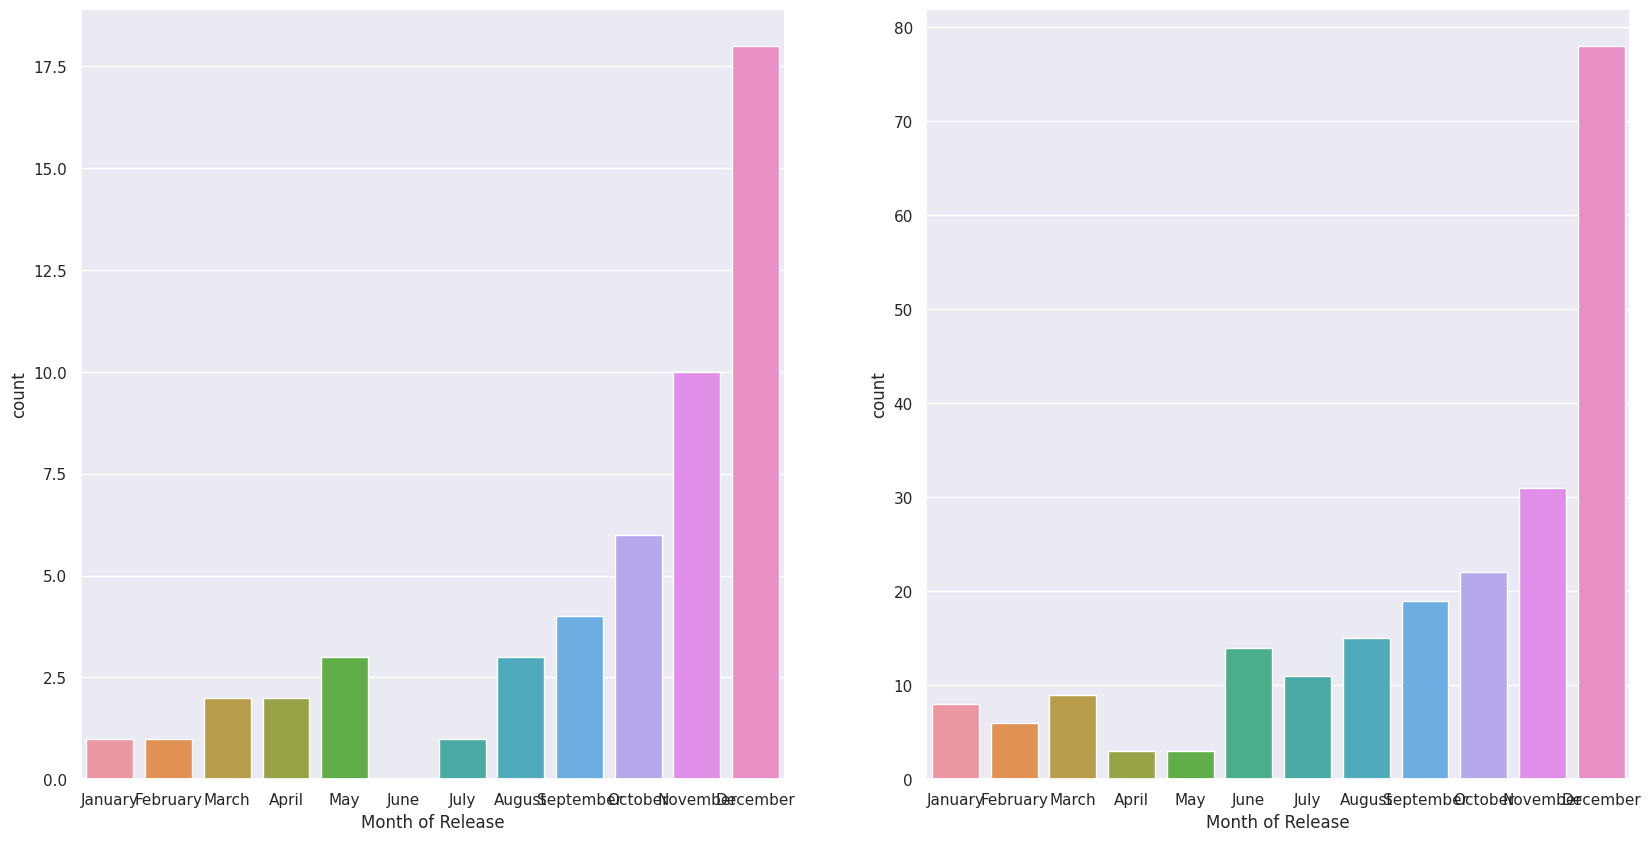

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

month_order = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September','October', 'November', 'December']

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(data = winners, x = 'Month of Release', order=month_order, ax=axs[0])
sns.countplot(data = nominees, x = 'Month of Release', order=month_order)

The plor on the left is for Oscar winners, and the plot on the right is for Oscar nominees. Looks like the general trend is the same for both, with more movies being released in the latter half of the year.

In [ ]:
winners['Month of Release'].value_counts()

December     18
November     10
October       6
September     4
August        3
May           3
March         2
April         2
January       1
February      1
July          1
Name: Month of Release, dtype: int64

In [ ]:
nominees["Month of Release"].value_counts()

December     78
November     31
October      22
September    19
August       15
June         14
July         11
March         9
January       8
February      6
April         3
May           3
Name: Month of Release, dtype: int64

From this we can see that no films released in June won the Oscars at all. In addition to this, the overwhelming majority of winning movies were released in November and December.

Now let's take a closer look at the number of nominations between the two.

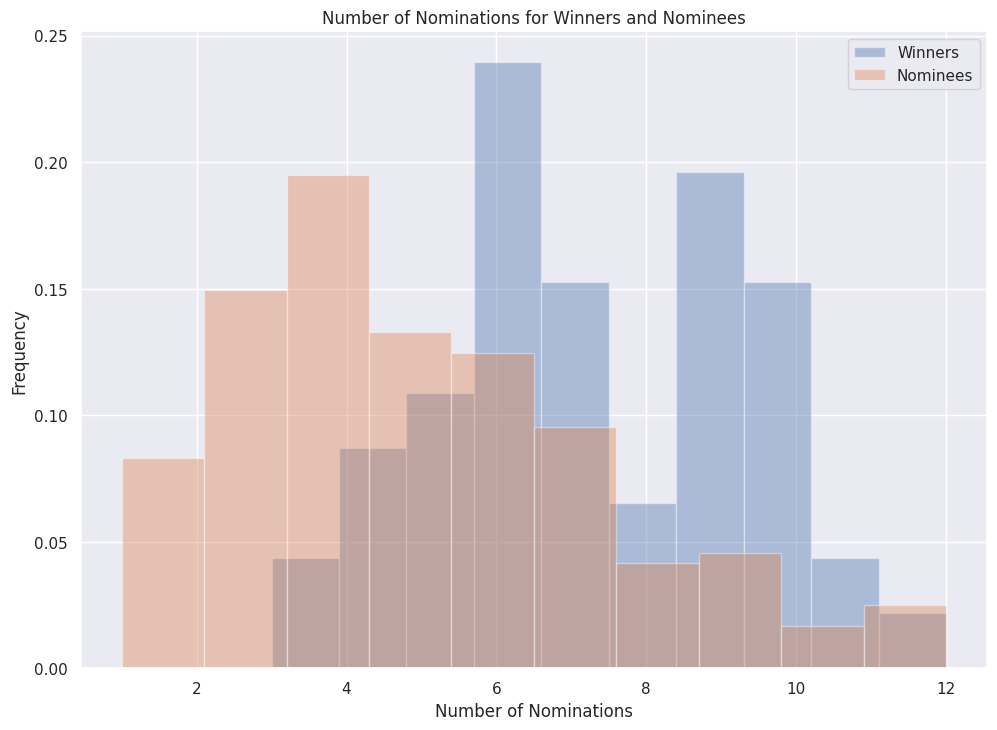

In [ ]:
winners_nom = winners['Nominations']
nominees_nom = nominees['Nominations']

plt.hist(winners_nom, alpha = 0.4, label = "Winners", density = True)
plt.hist(nominees_nom, alpha = 0.4, label = "Nominees", density = True)
plt.title("Number of Nominations for Winners and Nominees")
plt.xlabel("Number of Nominations")
plt.ylabel("Frequency")
plt.legend()

As you can see the general distribution of number of nominations is higher for the winners than the nominees. A larger frequency of movies had more than 6 nominations in the winners dataset than the nominees dataset.

What about the IMDB Rating?


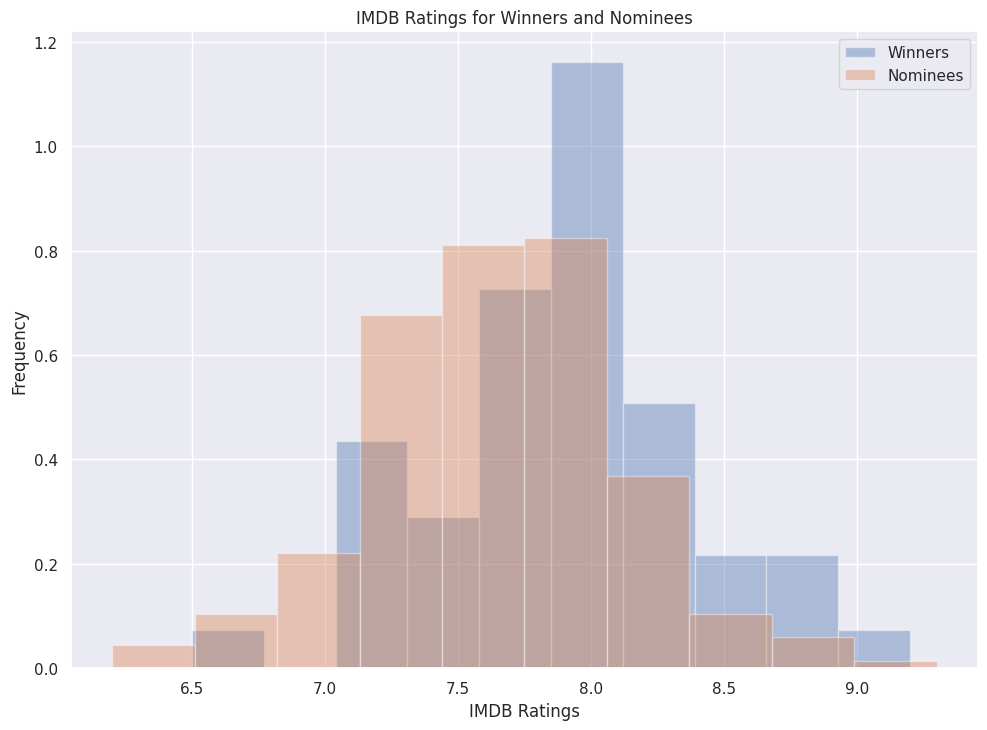

In [ ]:
winners_imdb = winners['IMDB Rating']
nominees_imdb = nominees['IMDB Rating']

plt.hist(winners_imdb, alpha = 0.4, label = "Winners", density = True)
plt.hist(nominees_imdb, alpha = 0.4, label = "Nominees", density = True)
plt.title("IMDB Ratings for Winners and Nominees")
plt.xlabel("IMDB Ratings")
plt.ylabel("Frequency")
plt.legend()

IMDB Rating distribution looks a lot more similar for both datasets than the number of nominations.

What about the genres? Is there a specific genre that tends to win more?

<Axes: xlabel='Genres', ylabel='count'>

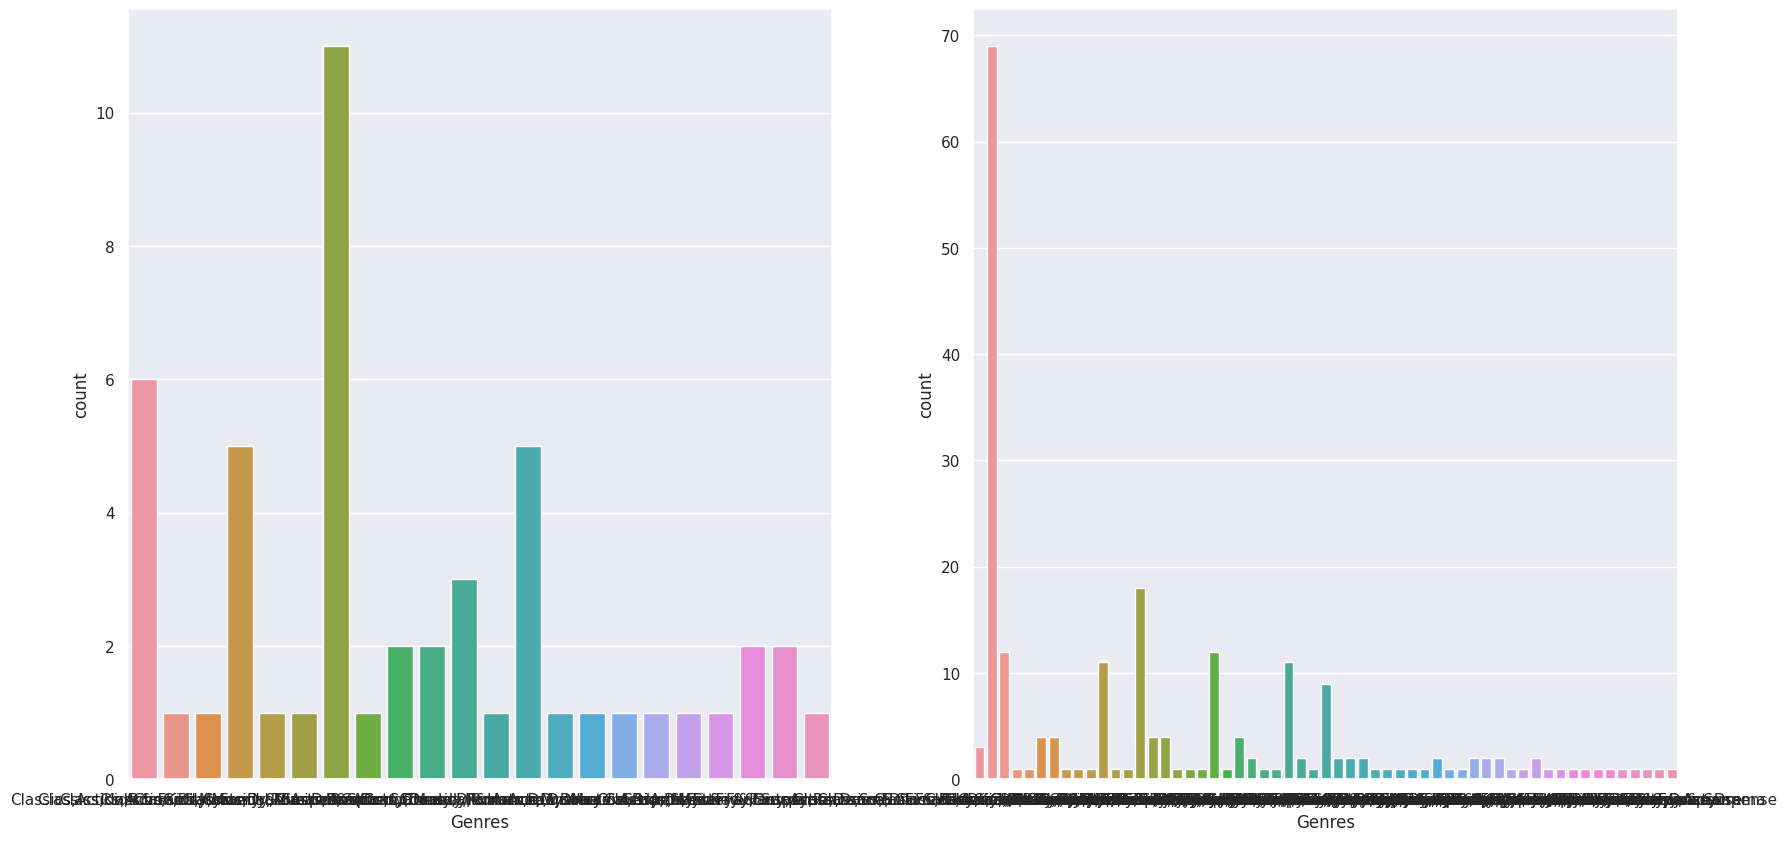

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(data = winners, x = 'Genres', ax=axs[0])
sns.countplot(data = nominees, x = 'Genres')

We next want to compare the different types of genres and the number of nominations that each genre has

In [105]:
group_genres_nominations = oscardata[['Genres', 'Nominations']].groupby('Genres').describe()
group_genres_nominations

Nominations                                      \
                                count      mean       std  min   25%  50%   
Genres                                                                      
Action & Adventure               30.0  7.100000  1.953776  4.0  6.00  7.0   
Comedy                           19.0  4.210526  1.988270  2.0  3.00  4.0   
Drama                            97.0  5.092784  2.077070  1.0  4.00  5.0   
Horror                            3.0  5.000000  2.000000  3.0  4.00  5.0   
Kids & Family                     6.0  7.333333  2.422120  5.0  5.25  7.0   
Musical & Performing Arts        15.0  5.866667  2.948769  2.0  3.50  6.0   
Mystery & Suspense               24.0  4.750000  1.750776  2.0  3.75  5.0   
RomCom                           22.0  4.636364  2.498484  2.0  3.00  4.0   
Romance                          22.0  5.909091  2.524340  2.0  4.00  5.0   
Science Fiction & Fantasy        24.0  7.125000  2.938685  3.0  4.75  6.0   
Sports & Fitness                  4.0  4.250000  2.362908  1.0  3.25  5.0   
Western                           4.0  6.500000  1.732051  4.0  6.25  7.0   

                                       
                            75%   max  
Genres                                 
Action & Adventure         8.00  11.0  
Comedy                     4.50   9.0  
Drama                      6.00  10.0  
Horror                     6.00   7.0  
Kids & Family              8.75  11.0  
Musical & Performing Arts  7.50  12.0  
Mystery & Suspense         6.00   9.0  
RomCom                     5.75  11.0  
Romance                    7.00  12.0  
Science Fiction & Fantasy  9.25  12.0  
Sports & Fitness           6.00   6.0  
Western                    7.25   8.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action & Adventure'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Musical & Performing Arts'),
  Text(6, 0, 'Mystery & Suspense'),
  Text(7, 0, 'RomCom'),
  Text(8, 0, 'Romance'),
  Text(9, 0, 'Science Fiction & Fantasy'),
  Text(10, 0, 'Sports & Fitness'),
  Text(11, 0, 'Western')])

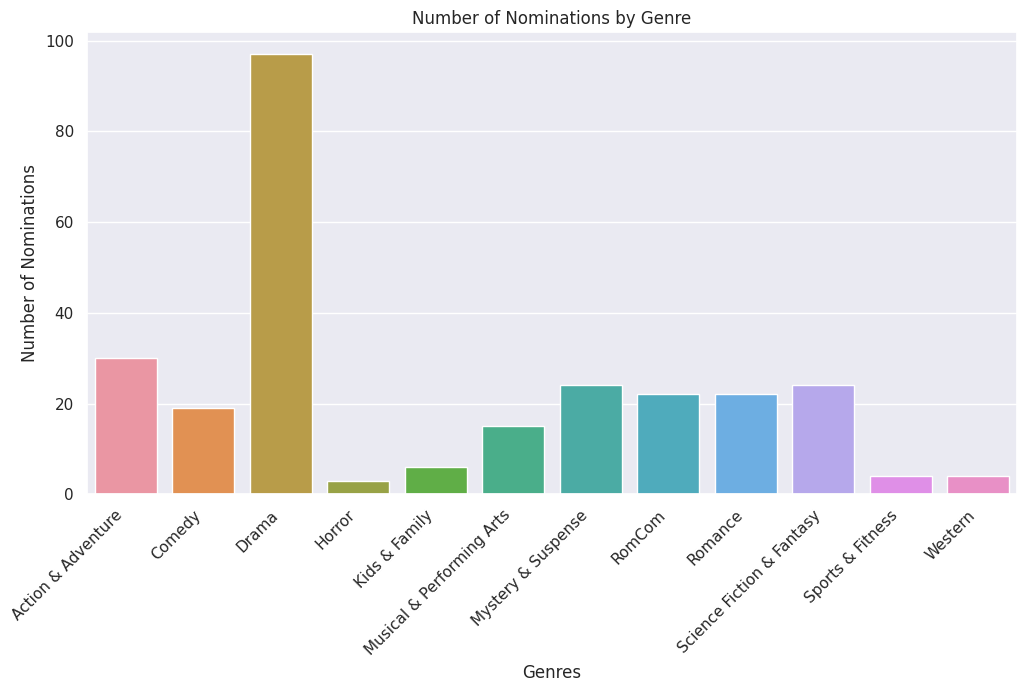

In [106]:
group_genres_nominations.columns = ['_'.join(col).strip() for col in group_genres_nominations.columns.values]

plt.figure(figsize=(12, 6))
sns.barplot(x=group_genres_nominations.index, y=group_genres_nominations['Nominations_count'])
plt.title('Number of Nominations by Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Nominations')
plt.xticks(rotation=45, ha='right')

(can we make these graphs display proportion instead of count instead)

# Ethics & Privacy

When considering ethical and privacy concerns within our project we will first look at the data itself. We are using Oscar nominations and winners, which are chosen by the Academy of Motion Picture Arts and Sciences (AMPAS). This group is not an accurate representation of the general population of people who view movies. Since the members of the AMPAS are likely not diverse in terms of gender, race, culture, fame, socioeconomic status, and so forth; their choices in movies is likely not an accurate representation of the population. This makes the data biased, to the perspectives of the members of the AMPAS. On account of this, our data is not generalizable outside of the scope of the Oscars.

Similar to the first concern, movies that are nominated for an Oscar are likely movies coming from well known studios, directors, producers, or some name already well known in the world of film. Movies from independent or new studios are less likely to be included in the Oscars at all. This is more of an issue with a bias in the Oscar nominations themselves, but is worth noting that our project is therefore not generalizable to all movies; only those within the Oscar nominations.

We also would like to consider how our project could affect potential stakeholders. Since we are using studio/producer/director names they could be negatively impacted if our data shows a correlation between those names and not winning the Oscars. We will write any conclusions with these potential impacts in mind. Additionally, our data does not contain any personal information about people except for their names as it appeared in their Oscar nomination. Our project and data also has the potential to be misconstrued if someone believes the factors we are analyzing are causes of the Oscar outcomes. They are not necessarily causations, and we will make this clear throughout our project.

# Team Expectations


For the expectations of our group, we mainly expect each other to be present at the weekly meetings and contribute ideas regularly. We also want everyone to be responsive to group messages and reply whenever they are able to. If we assign tasks to complete by ourselves, everyone should complete them before the deadline; if one of us cannot complete the task assigned to us, we should let the rest of the team know we can’t complete it. Overall, we expect everyone to have good communication and to stay involved in all aspects of the project.
Signed by:
- Lucy Granger
- Jenny Quach
- Anvita Suresh
- Boston Thome
- Angela Wu


# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research |
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal |
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |